In [30]:
import pandas as pd
import requests
from IPython.display import Image
import time
from ftplib import FTP

from PIL import Image
from PIL import ImageFile
import rawpy
import imageio
ImageFile.LOAD_TRUNCATED_IMAGES = True


import os, shutil

import os
import sys

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
imagecount = 95

In [4]:
typdict = {'NDC':'str'}
df = pd.read_csv('../data/directory_of_images.txt',sep='|', dtype=typdict, names=['NDC','IDK','FILE','TYPE','DRUG'])
df = df.dropna()
df.DRUG = df.DRUG.str.upper()
df[['ORIG_FOLDER','IMAGES','FILENAME']] = df.FILE.str.split('/', expand=True)
df['FILETYPE'] = df.FILENAME.str[-4:]
df = df[df.FILETYPE != '.WMV']

In [5]:
ndcs = df.NDC.value_counts()
n = ndcs[ndcs == imagecount].index
# #n100 = ndcs[ndcs <= 100].index
# ndcs50100 = list(set(n50) & set(n100))
dfn = df[df.NDC.isin(n)]
dfn

,NDC,IDK,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE
26852,00093725401,1,PillProjectDisc67/images/CJH8_95CTK13Q5T739ORS...,C3PI_Reference,GLIMEPIRIDE 1MG TAB,PillProjectDisc67,images,CJH8_95CTK13Q5T739ORSM4OE1HMJY2.CR2,.CR2
26853,00093725401,1,PillProjectDisc79/images/CUF2F_2_PEY!-WPZN5A_T...,C3PI_Reference,GLIMEPIRIDE TABLETS USP,PillProjectDisc79,images,CUF2F_2_PEY!-WPZN5A_T9J-!67O1LK.CR2,.CR2
26854,00093725401,1,PillProjectDisc82/images/CXMI3WSYHY0KB4T-X_P!V...,C3PI_Reference,GLIMEPIRIDE 1MG TAB,PillProjectDisc82,images,CXMI3WSYHY0KB4T-X_P!VFVUVQNLL06.CR2,.CR2
26855,00093725401,1,PillProjectDisc8/images/5CEDGLAOHO_MZXCBRD1!L4...,C3PI_Reference,GLIMEPIRIDE TABLETS USP,PillProjectDisc8,images,5CEDGLAOHO_MZXCBRD1!L48FU0C4XD.CR2,.CR2
26856,00093725401,1,PillProjectDisc101/images/RWM2HZ054W9X2TD7XY55...,C3PI_Test,GLIMEPIRIDE 1MG TAB,PillProjectDisc101,images,RWM2HZ054W9X2TD7XY55I5JPD3LIH5.JPG,.JPG
...,...,...,...,...,...,...,...,...,...
92460,50419010510,1,PillProjectDisc62/images/CESGSG0GFMZZL1IHAB09O...,MC_COOKED_CALIBRATED_V1.2,BETAPACE,PillProjectDisc62,images,CESGSG0GFMZZL1IHAB09OIRO-IKEMIE.PNG,.PNG
92461,50419010510,1,PillProjectDisc85/images/DHNVMVC1KAUEOYEHZ34B4...,MC_COOKED_CALIBRATED_V1.2,BETAPACE 80MG TAB,PillProjectDisc85,images,DHNVMVC1KAUEOYEHZ34B4NZ-TX!7OC.PNG,.PNG
92462,50419010510,1,PillProjectDisc96/images/M_N!3YQS2L1PE-THOV7DC...,MC_COOKED_CALIBRATED_V1.2,BETAPACE 80MG TAB,PillProjectDisc96,images,M_N!3YQS2L1PE-THOV7DCF3LW3GN70.PNG,.PNG
92463,50419010510,1,PillProjectDisc97/images/OFOWX68GQ9S4W9R_K-67V...,MC_COOKED_CALIBRATED_V1.2,BETAPACE,PillProjectDisc97,images,OFOWX68GQ9S4W9R_K-67VQT1NODN65.PNG,.PNG


In [6]:
dfn.DRUG.value_counts()

ALLOPURINOL 300MG TABS        95
GLIMEPIRIDE 1MG TAB           64
LANOXIN TABLETS, USP          53
COMBIVIR                      53
BETAPACE                      53
LANOXIN 0.125MG TABLETS       42
BETAPACE 80MG TAB             42
COMBIVIR 150/300MG TABLETS    42
GLIMEPIRIDE TABLETS USP       31
Name: DRUG, dtype: int64

In [7]:
drugs = dfn.NDC.value_counts()
drugslist = drugs.index.tolist()
len(dfn.NDC.value_counts()),drugs

(5,
 50419010510    95
 49702020218    95
 00093725401    95
 00173024255    95
 00591554405    95
 Name: NDC, dtype: int64)

In [8]:
df_a = dfn.groupby(['DRUG','NDC']).count()
df_a.reset_index(inplace=True)
drug_ndc = df_a[['DRUG','NDC']]
drug_ndc

,DRUG,NDC
0,ALLOPURINOL 300MG TABS,00591554405
1,BETAPACE,50419010510
2,BETAPACE 80MG TAB,50419010510
3,COMBIVIR,49702020218
4,COMBIVIR 150/300MG TABLETS,49702020218
5,GLIMEPIRIDE 1MG TAB,00093725401
6,GLIMEPIRIDE TABLETS USP,00093725401
7,LANOXIN 0.125MG TABLETS,00173024255
8,"LANOXIN TABLETS, USP",00173024255


In [9]:
droplist = []

df = dfn[~dfn.NDC.isin(droplist)]

In [10]:
df.DRUG[df.NDC == '00591554405'] = 'ALLOPURINOL 300MG'
df.DRUG[df.NDC == '50419010510'] = 'BETAPACE 80MG'
df.DRUG[df.NDC == '49702020218'] = 'COMBIVIR 150/300MG'
df.DRUG[df.NDC == '00093725401'] = 'GLIMEPIRIDE 1MG'
df.DRUG[df.NDC == '00173024255'] = 'LANOXIN 0.125MG'

/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [11]:
df

,NDC,IDK,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE
26852,00093725401,1,PillProjectDisc67/images/CJH8_95CTK13Q5T739ORS...,C3PI_Reference,GLIMEPIRIDE 1MG,PillProjectDisc67,images,CJH8_95CTK13Q5T739ORSM4OE1HMJY2.CR2,.CR2
26853,00093725401,1,PillProjectDisc79/images/CUF2F_2_PEY!-WPZN5A_T...,C3PI_Reference,GLIMEPIRIDE 1MG,PillProjectDisc79,images,CUF2F_2_PEY!-WPZN5A_T9J-!67O1LK.CR2,.CR2
26854,00093725401,1,PillProjectDisc82/images/CXMI3WSYHY0KB4T-X_P!V...,C3PI_Reference,GLIMEPIRIDE 1MG,PillProjectDisc82,images,CXMI3WSYHY0KB4T-X_P!VFVUVQNLL06.CR2,.CR2
26855,00093725401,1,PillProjectDisc8/images/5CEDGLAOHO_MZXCBRD1!L4...,C3PI_Reference,GLIMEPIRIDE 1MG,PillProjectDisc8,images,5CEDGLAOHO_MZXCBRD1!L48FU0C4XD.CR2,.CR2
26856,00093725401,1,PillProjectDisc101/images/RWM2HZ054W9X2TD7XY55...,C3PI_Test,GLIMEPIRIDE 1MG,PillProjectDisc101,images,RWM2HZ054W9X2TD7XY55I5JPD3LIH5.JPG,.JPG
...,...,...,...,...,...,...,...,...,...
92460,50419010510,1,PillProjectDisc62/images/CESGSG0GFMZZL1IHAB09O...,MC_COOKED_CALIBRATED_V1.2,BETAPACE 80MG,PillProjectDisc62,images,CESGSG0GFMZZL1IHAB09OIRO-IKEMIE.PNG,.PNG
92461,50419010510,1,PillProjectDisc85/images/DHNVMVC1KAUEOYEHZ34B4...,MC_COOKED_CALIBRATED_V1.2,BETAPACE 80MG,PillProjectDisc85,images,DHNVMVC1KAUEOYEHZ34B4NZ-TX!7OC.PNG,.PNG
92462,50419010510,1,PillProjectDisc96/images/M_N!3YQS2L1PE-THOV7DC...,MC_COOKED_CALIBRATED_V1.2,BETAPACE 80MG,PillProjectDisc96,images,M_N!3YQS2L1PE-THOV7DCF3LW3GN70.PNG,.PNG
92463,50419010510,1,PillProjectDisc97/images/OFOWX68GQ9S4W9R_K-67V...,MC_COOKED_CALIBRATED_V1.2,BETAPACE 80MG,PillProjectDisc97,images,OFOWX68GQ9S4W9R_K-67VQT1NODN65.PNG,.PNG


In [12]:
df.DRUG.value_counts()

ALLOPURINOL 300MG     95
GLIMEPIRIDE 1MG       95
BETAPACE 80MG         95
LANOXIN 0.125MG       95
COMBIVIR 150/300MG    95
Name: DRUG, dtype: int64

In [13]:
df_a = df.groupby(['DRUG','NDC']).count()
df_a.reset_index(inplace=True)
drug_ndc = df_a[['DRUG','NDC']]
drug_ndc

,DRUG,NDC
0,ALLOPURINOL 300MG,00591554405
1,BETAPACE 80MG,50419010510
2,COMBIVIR 150/300MG,49702020218
3,GLIMEPIRIDE 1MG,00093725401
4,LANOXIN 0.125MG,00173024255


## Sample Batch

In [14]:
samplesdf = df.groupby(['NDC']).min().reset_index()
samplesdf

,NDC,IDK,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE
0,00093725401,1,PillProjectDisc1/images/!7WF161YS_R5ET9Y!26E6U...,C3PI_Reference,GLIMEPIRIDE 1MG,PillProjectDisc1,images,!7WF161YS_R5ET9Y!26E6UHXF9HXDU.JPG,.CR2
1,00173024255,1,PillProjectDisc10/images/6_6!XJ73P9O12E6LVGBAI...,C3PI_Reference,LANOXIN 0.125MG,PillProjectDisc10,images,08_IJPXWRE5_8!_W4CPEQWRB4S21B!.JPG,.CR2
2,00591554405,1,PillProjectDisc1/images/!WT4Y657!VOLO3YRBJ5HS9...,C3PI_Reference,ALLOPURINOL 300MG,PillProjectDisc1,images,!WT4Y657!VOLO3YRBJ5HS9MSRVMZKE.JPG,.CR2
3,49702020218,1,PillProjectDisc101/images/S!Y8UKL4UF_V-BESBWG-...,C3PI_Reference,COMBIVIR 150/300MG,PillProjectDisc101,images,-WT_RX0KVFC9BH0ZFM643W5SJMZL!1.JPG,.CR2
4,50419010510,1,PillProjectDisc1/images/!56HENXQPITL7C!4A52GSM...,C3PI_Reference,BETAPACE 80MG,PillProjectDisc1,images,!56HENXQPITL7C!4A52GSM0YNF5KKA.PNG,.CR2


In [15]:
sampleslist = samplesdf.FILE.tolist()
sampleslist.sort()
sampleslist

['PillProjectDisc1/images/!56HENXQPITL7C!4A52GSM0YNF5KKA.PNG',
 'PillProjectDisc1/images/!7WF161YS_R5ET9Y!26E6UHXF9HXDU.JPG',
 'PillProjectDisc1/images/!WT4Y657!VOLO3YRBJ5HS9MSRVMZKE.JPG',
 'PillProjectDisc10/images/6_6!XJ73P9O12E6LVGBAIIGMNO252A.JPG',
 'PillProjectDisc101/images/S!Y8UKL4UF_V-BESBWG-YDTW0ZHOY2.PNG']

In [16]:
ftpdir = {}
for i in range(0,len(sampleslist)):
    ftpcall = sampleslist[i].split('/')
    ftppath = ftpcall[0]+'/'+ftpcall[1]+ '/'
    ftpfile = ftpcall[-1]
    ftpdir.setdefault(ftppath,[])
    ftpdir[ftppath].append(ftpfile)
len(ftpdir)

3

In [39]:
%cd /Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-39-42d809a885dd>", line 1, in <module>
    get_ipython().run_line_magic('cd', '/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data')
  File "/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2317, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-92>", line 2, in cd
  File "/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/IPython/core/magics/osm.py", line 334, in cd
    oldcwd = os.getcwd()
PermissionError: [Errno 1] Operation not permitted

Duri

PermissionError: [Errno 1] Operation not permitted

In [38]:
folder = 'img'+str(imagecount)
paths = folder + '/' + folder
print(folder, paths)

img95 img95/img95


In [26]:
try:
    os.makedirs(paths)
except:
    print('Folder present')

In [ ]:
%cd $folder
%pwd
dloaded = os.listdir()
for key in ftpdir.keys():
    ftp = FTP('lhcftp.nlm.nih.gov')
    ftp.login()
    ftp.cwd('Open-Access-Datasets/Pills//')
    ftp.cwd(key)
    for value in ftpdir[key]:
        if value not in dloaded:
            with open(value, 'wb') as fp:
                ftp.retrbinary('RETR '+ value, fp.write)
    ftp.cwd('..')
    ftp.cwd('..')
%cd $folder

In [57]:
%cd ..

/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/img50


In [27]:
%cd $folder 

/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/img95


In [28]:
for filename in os.listdir():
    if filename.endswith(".PNG") or filename.endswith(".JPG"): 
        im1 = Image.open(r'{}'.format(filename))
        rgb_im = im1.convert('RGB')
        rgb_im.save(r'{}/{}.JPG'.format(folder,filename[:-4]))
        continue
    elif filename.endswith(".CR2") and os.path.getsize(filename) > 0:
        print(filename)
        raw = rawpy.imread('{}'.format(filename))
        rgb = raw.postprocess()
        imageio.imsave('{}/{}.JPG'.format(folder,filename[:-4]), rgb)
        print(filename)
        continue

%cd $folder

/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/img95/img95


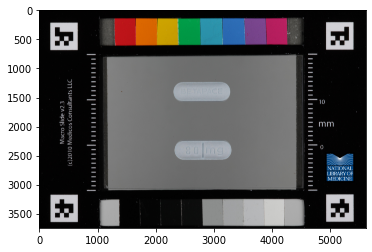

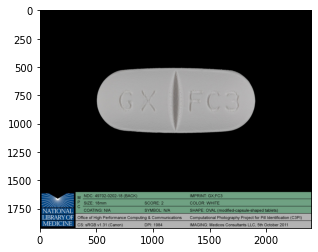

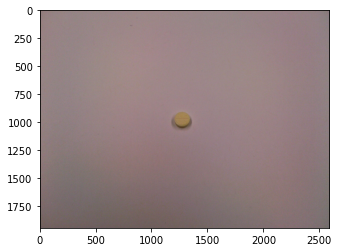

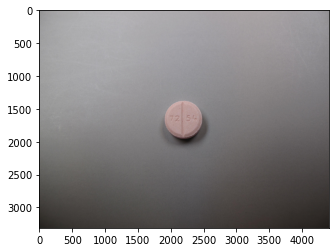

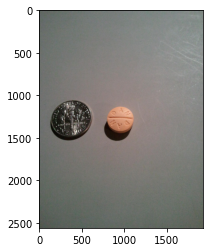

In [31]:
images = os.listdir()
def process(filename):
    image = mpimg.imread(filename)
    plt.figure()
    plt.imshow(image)

for file in images:
    process(file)



## Get Batch

In [33]:
drugsftp = df.FILE.tolist()
drugsftp.sort()
drugsftp[:10]

['PillProjectDisc1/images/!56HENXQPITL7C!4A52GSM0YNF5KKA.PNG',
 'PillProjectDisc1/images/!7WF161YS_R5ET9Y!26E6UHXF9HXDU.JPG',
 'PillProjectDisc1/images/!G_6-MR6ALJIVSJV_FG81XV_T76S5C.JPG',
 'PillProjectDisc1/images/!KIVP9GRT_9CCE7MKA2-!EUSBJK44B.PNG',
 'PillProjectDisc1/images/!WT4Y657!VOLO3YRBJ5HS9MSRVMZKE.JPG',
 'PillProjectDisc10/images/6_6!XJ73P9O12E6LVGBAIIGMNO252A.JPG',
 'PillProjectDisc10/images/6_6!XJ73P9O12E6LVGBAIIGMNO252A.JPG',
 'PillProjectDisc10/images/71F0PADPK6212-1HT3-IBI-Y!KK!1B.JPG',
 'PillProjectDisc10/images/71QVB659EJF7J2UOJAR9107P-CC6GM.JPG',
 'PillProjectDisc10/images/71QVB659EJF7J2UOJAR9107P-CC6GM.JPG']

In [34]:
ftpdir = {}
for i in range(0,len(drugsftp)):
    ftpcall = drugsftp[i].split('/')
    ftppath = ftpcall[0]+'/'+ftpcall[1]+ '/'
    ftpfile = ftpcall[-1]
    ftpdir.setdefault(ftppath,[])
    ftpdir[ftppath].append(ftpfile)
len(ftpdir)

102

In [37]:
%cd /Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/img95
for key in ftpdir.keys():
    #%cd /content/drive/My Drive/Project: Pill ID/Data
    ftp = FTP('lhcftp.nlm.nih.gov')
    ftp.login()
    ftp.cwd('Open-Access-Datasets/Pills//')
    ftp.cwd(key)
    dloaded = os.listdir()
    print(key)
    for value in ftpdir[key]:
      if value not in dloaded:
        with open(value, 'wb') as fp:
            ftp.retrbinary('RETR '+ value, fp.write)
    ftp.cwd('..')
    ftp.cwd('..')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-37-b6468b8102d8>", line 1, in <module>
    get_ipython().run_line_magic('cd', '/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/img95')
  File "/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2317, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-92>", line 2, in cd
  File "/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/IPython/core/magics/osm.py", line 334, in cd
    oldcwd = os.getcwd()
PermissionError: [Errno 1] Operation not permitted

PermissionError: [Errno 1] Operation not permitted

In [ ]:
%cd $folder 

for filename in os.listdir():
    if filename.endswith(".PNG") or filename.endswith(".JPG"): 
        im1 = Image.open(r'{}'.format(filename))
        rgb_im = im1.convert('RGB')
        rgb_im.save(r'{}/{}.JPG'.format(folder,filename[:-4]))
        continue
    elif filename.endswith(".CR2") and os.path.getsize(filename) > 0:
        print(filename)
        raw = rawpy.imread('{}'.format(filename))
        rgb = raw.postprocess()
        imageio.imsave('{}/{}.JPG'.format(folder,filename[:-4]), rgb)
        print(filename)
        continue

%cd $folder